<a href="https://colab.research.google.com/github/jonashendler/Album_de_figurinhas/blob/main/Projeto_Album_de_Figurinhas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **INTRODUÇÃO**

Essa programação foi realizada com base na aula **Python para Iniciantes - Do Zero ao Primeiro Projeto!** de Data Science do professor **Ricardo Rocha** da **FLAI**.

Com o objetivo de introduzir o Python e seus comando básicos, foi proposto como exercício, avaliar quanto seria necessario gastar para preencher um álbum de figurinhas.

## **PROJETO: Álbum de figurinhas**
- Total de figurinhas: **212**.
- Preço do livro: **R\$ 10,00**.
- Envelope com 4 figurinhas: **R\$ 4,00**.



### **SUPOSIÇÕES**
1. Todas as figurinhas tem igual probabilidade de serem sorteradas.
2. Um pacotinho é comprado por vez até que se complete o álbum.  



### **ALGORITMO**
1. Definição dos parâmetros do álbum a ser adiquirido;
2. Comprar o álbum (zerado);
3. Comprar um pacotinho de figurinhas (4 figurinhas cada, que podem ser repetidas);
4. Colar no álbum e verificar se o álbum está completo;
5. Verificar se o álbum está completo;
6. Unir todos os passos anteriores para simular o álbum completo.


In [2]:
import numpy as np

# 1. Definição dos parâmetros do álbum de figurinhas
n_fig = 10            # Simulando álbum com 10 figurinhas para melhor visualização
preco_pacote = 4
fig_por_pacote = 4
preco_album = 10 

In [3]:
# 2. Representação do álbum
album = np.zeros(n_fig)
album

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [4]:
# 3. Representação do pacote de figurinhas (A partir da figurinha de nº 1)
pacotinho = np.random.choice(range(1, n_fig+1), fig_por_pacote)
pacotinho

array([7, 9, 1, 2])

In [5]:
# 4. Colando as figurinhas no álbum (A figurinha nº 1 será colada na 1ª posição)
for i in pacotinho:
    album[i-1] += 1

album

array([1., 1., 0., 0., 0., 0., 1., 0., 1., 0.])

In [6]:
# 5. Verificando se o álbum está completo
np.all(album >= 1)    # Função np.all verifica se todos os valores são TRUE

False

In [7]:
# 6. Simulando álbum completo

import numpy as np

n_fig = 212
preco_pacote = 4
fig_por_pacote = 4
preco_album = 10

def SimulaAlbum():
    album = np.zeros(n_fig) 
    pacotes = 0
    while not np.all(album >= 1):
        pacotinho = np.random.choice(range(1, n_fig+1), fig_por_pacote)
        pacotes += 1

        for i in pacotinho:
            album[i-1] += 1
 
    valor_gasto = preco_album + preco_pacote * pacotes 

    return print('O valor gasto para preencher o álbum foi de R$ {},00 e foram necessários {} pacotinhos.' .format(valor_gasto, pacotes))

SimulaAlbum()

O valor gasto para preencher o álbum foi de R$ 918,00 e foram necessários 227 pacotinhos.



### **EXERCÍCIOS**
1. Qual o valor médio investido para completar o álbum nessas condições?
2. Quantos pacotes são necessários comprar, em média, para completar o álbum?
3. Qual é a distribuição empírica do valor investido para completar o álbum?
4. Qual a probabilidade de se gastar menos que R\$1500,00 para completar o álbum?
5. Qual a probabilidade de se gastar mais do que a média para completar o álbum?
6. Qual é um intervalo de confiança de 95% para o gasto ao se completar o álbum?
7. Qual o valor médio gasto caso se esteja completando o álbum com mais um amigo? 
8. Qual o valor médio gasto caso se esteja completando o álbum com mais dois amigos? 


In [32]:
import numpy as np

n_fig = 212
preco_pacote = 4
fig_por_pacote = 4
preco_album = 10
simulacoes = 1000

def SimulaAlbum():
    album = np.zeros(n_fig) 
    pacotes = 0
    while not np.all(album >= 1):
        pacotinho = np.random.choice(range(1, n_fig+1), fig_por_pacote)
        pacotes += 1

        for i in pacotinho:
            album[i-1] += 1
 
    valor_gasto = preco_album + preco_pacote * pacotes 

    return valor_gasto, pacotes

SimulaAlbum()

def Simulacao(simulacoes, silencio = False):
  valores = []
  for i in range(simulacoes):
    valores.append(SimulaAlbum()[0])
    if not silencio:
      if (i+1) % 100 == 0:
        print('Simulação: ', i+1, '/', simulacoes)
  return valores

# sim = Simulacao(simulacoes)

#### 1. Qual o valor médio investido para completar o álbum nessas condições?

In [33]:
print('O valor médio gasto foi: R$', round(np.mean(sim), 2))


O valor médio gasto foi: R$ 1256.54


#### 2. Quantos pacotes são necessários comprar, em média, para completar o álbum?

In [10]:
import math

print('O numero médio de pacotes foi:', round((np.mean(sim) - preco_album)/preco_pacote, 2))

print('O número médio de pacotes foi:', math.ceil((np.mean(sim) - preco_album)/preco_pacote)) # Arredondando para cima

O numero médio de pacotes foi: 311.63
O número médio de pacotes foi: 312


#### 3. Qual é a distribuição empírica do valor investido para completar o álbum?

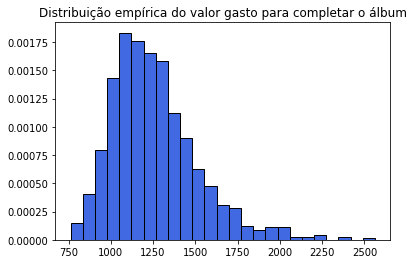

In [11]:
import matplotlib.pyplot as plt

plt.hist(sim, bins = 25, density = True, color = 'royalblue', edgecolor = 'black')
plt.title('Distribuição empírica do valor gasto para completar o álbum')
plt.show()

#### 4. Qual a probabilidade de se gastar menos que R\$ 1.500,00 para completar o álbum?


In [12]:
prob1 = sum(np.array(sim) < 1500)/simulacoes
print('A probabilidade de se gastar menos de R$ 1.500,00 é {:.2f}%'.format(prob1*100))

A probabilidade de se gastar menos de R$ 1.500,00 é 85.20%


#### 5. Qual a probabilidade de se gastar mais do que a média para completar o álbum?

In [13]:
prob2 = sum(np.array(sim) > np.array(sim).mean())/simulacoes
 
print('A probabilidade de se gastar mais do que a média é {:.2f}%'.format(prob2*100))

A probabilidade de se gastar mais do que a média é 43.50%


#### 6. Qual é um intervalo de confiança de 95% para o gasto ao se completar o álbum?


In [14]:
qts = np.quantile(sim, [0.025, 0.975])
print('O intervalo de confiança de 95% para o gasto total é ({:.2f}, {:.2f})'.format(qts[0], qts[1]))

O intervalo de confiança de 95% para o gasto total é (877.90, 1922.00)


Para simular a estratégia de completar o álbum em grupo, 2 ou mais, precisamos ajustar a nossa função que simula o completamento de um álbum.

In [15]:
def SimulaAlbum(qtde_albuns):
    album = np.zeros(n_fig) 
    pacotes = 0
    while not np.all(album >= qtde_albuns):
        pacotinho = np.random.choice(range(1, n_fig+1), fig_por_pacote)
        pacotes += 1

        for i in pacotinho:
            album[i-1] += 1
 
    valor_gasto = qtde_albuns*preco_album + preco_pacote * pacotes 
    valor_gasto_por_album = valor_gasto/qtde_albuns

    return valor_gasto, pacotes, valor_gasto_por_album

def Simulacao(qtde_albuns, simulacoes, silencio = False):
    valores = []
    for i in range(simulacoes):
        valores.append(SimulaAlbum(qtde_albuns)[2])
        if not silencio:
            if (i+1) % 100 == 0:
                print('Simulação: ', i+1, '/', simulacoes)
    return valores

#### 7. Qual o valor médio gasto caso se esteja completando o álbum com mais um amigo?

In [16]:
sim2 = Simulacao(2, 400, True) 
c2 = np.array(sim2).mean()
print('Custo médio para cada álbum entre 2 amigos:', round(c2, 2) )

Custo médio para cada álbum entre 2 amigos: 873.6


#### 8. Qual o valor médio gasto caso se esteja completando o álbum com mais dois amigos?

In [17]:
sim3 = Simulacao(3, 100) 
c3 = np.array(sim3).mean()
print('Custo médio de cada álbum entre 3 amigos:', round(c3, 2) )

Simulação:  100 / 100
Custo médio de cada álbum entre 3 amigos: 729.72


### E quando estamos trocando figurinhas na praça?


Vamos ajustar a nossa função que simula o completamento de um álbum, para funcionar para uma quantidade variável de álbuns, representando assim uma estratégia de completar o álbum em grupo.

In [18]:
import numpy as np
import time
import math
import matplotlib.pyplot as plt

def SimulacaoPraca(n_pessoas, simulacoes):
    medias = []
    n_pessoas = list(range(1, n_pessoas + 1, 1))
    for i in n_pessoas: 
        aux = Simulacao(i, simulacoes, silencio = False)
        medias.append(round(np.array(aux).mean(), 2))
    return n_pessoas, medias

In [19]:
SimulacaoPraca(10,5)

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [1069.2, 845.2, 686.8, 640.4, 604.24, 552.27, 531.94, 468.0, 451.24, 463.28])

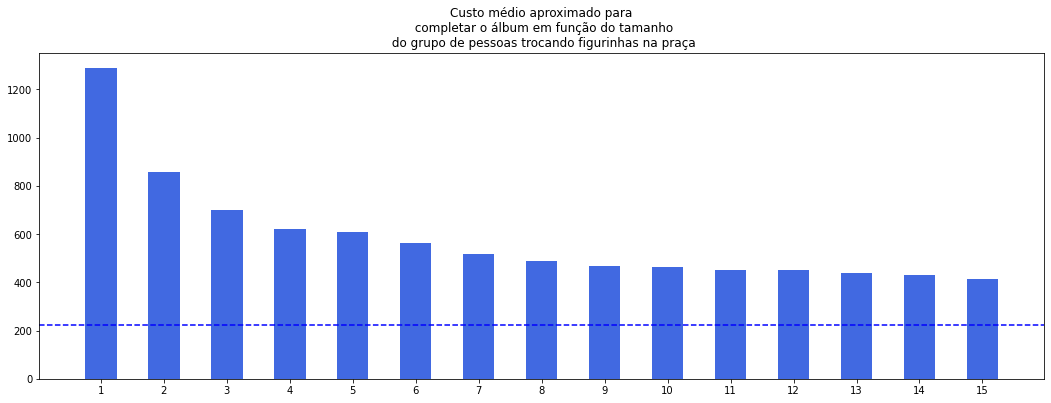

In [20]:
sim_praca = SimulacaoPraca(15, 20)

def GraficoCustoPraca(simulacao):

    minimo_possivel = math.ceil((n_fig/fig_por_pacote)*preco_pacote + preco_album)

    plt.figure(figsize=(18, 6))
    plt.bar(simulacao[0], simulacao[1], width = 0.5, color = 'royalblue')
    plt.xticks(simulacao[0])
    plt.axhline(y = minimo_possivel, linestyle = 'dashed', color = 'blue')
    plt.title('Custo médio aproximado para\n completar o álbum em função do tamanho\n do grupo de pessoas trocando figurinhas na praça')
    plt.show()

GraficoCustoPraca(sim_praca)


### **OUTRAS PERGUNTAS (FAÇA COMO EXERCÍCIO)**

Considere o contexto do projeto do álbum de figurinhas e responda as perguntas adicionais:


#### 1. Quantas vezes saiu a figurinha mais repetida, em média?

In [21]:
import numpy as np
import math

n_fig = 212
preco_pacote = 4
fig_por_pacote = 4
preco_album = 10

def SimulaMaximo(qtde_albuns):
    album = np.zeros(n_fig) 
    pacotes = 0
    while not np.all(album >= qtde_albuns):
        pacotinho = np.random.choice(range(1, n_fig+1), fig_por_pacote)
        pacotes += 1

        for i in pacotinho:
            album[i-1] += 1

    return max(album)

SimulaMaximo(1)


15.0

In [22]:
def MaiorFreq(qtde_albuns):
    maximos = []
    qtde_albuns = list(range(1, qtde_albuns + 1, 1))
    for i in qtde_albuns: 
        maximos.append(SimulaMaximo(1))
    return maximos

In [23]:
Maximos = MaiorFreq(10)
Maximos

[13.0, 13.0, 15.0, 10.0, 11.0, 13.0, 15.0, 10.0, 12.0, 15.0]

In [24]:
media = np.mean(Maximos)
round(media, 1)

12.7

#### 2. Em média, quantas figurinhas não se repetem ao completar o álbum?


In [29]:
import numpy as np
import math

n_fig = 212
preco_pacote = 4
fig_por_pacote = 4
preco_album = 10

def SimulaAlbum(qtde_albuns):
    album = np.zeros(n_fig) 
    pacotes = 0
    while not np.all(album >= qtde_albuns):
        pacotinho = np.random.choice(range(1, n_fig+1), fig_por_pacote)
        pacotes += 1

        for i in pacotinho:
            album[i-1] += 1
    
    exclusivas = sum([min == 1 for min in album])

    return exclusivas

In [30]:
def NaoRepete(qtde_albuns):
    exclusivas = []
    qtde_albuns = list(range(1, qtde_albuns + 1, 1))
    for i in qtde_albuns: 
        exclusivas.append(SimulaAlbum(1))
    return exclusivas

In [31]:
Exclusivas = NaoRepete(10)
Exclusivas

[2, 3, 2, 4, 7, 3, 4, 7, 4, 9]

In [28]:
media = np.mean(Exclusivas)
round(media, 1)

4.7

#### 3. Faça um gráfico da porcentagem completada esperada em função do número de pacotes comprados.

 ## **Links Úteis** <a name="links"></a>

1. [Aula Prof. Ricardo Rocha](https://www.youtube.com/watch?v=idwz1MjUDQE&t=8021s)